<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/090324BuildingSegmentation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.5/262.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image  = "/content/drive/MyDrive/Colab/Artboard 1 copy 3.png"

In [ ]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

Model checkpoint for vit_h not found.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:31<00:00, 81.2MB/s]


In [ ]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(30, 30), mask_multiplier=255
)

  0%|          | 0/49 [03:27<?, ?it/s]


KeyboardInterrupt: 

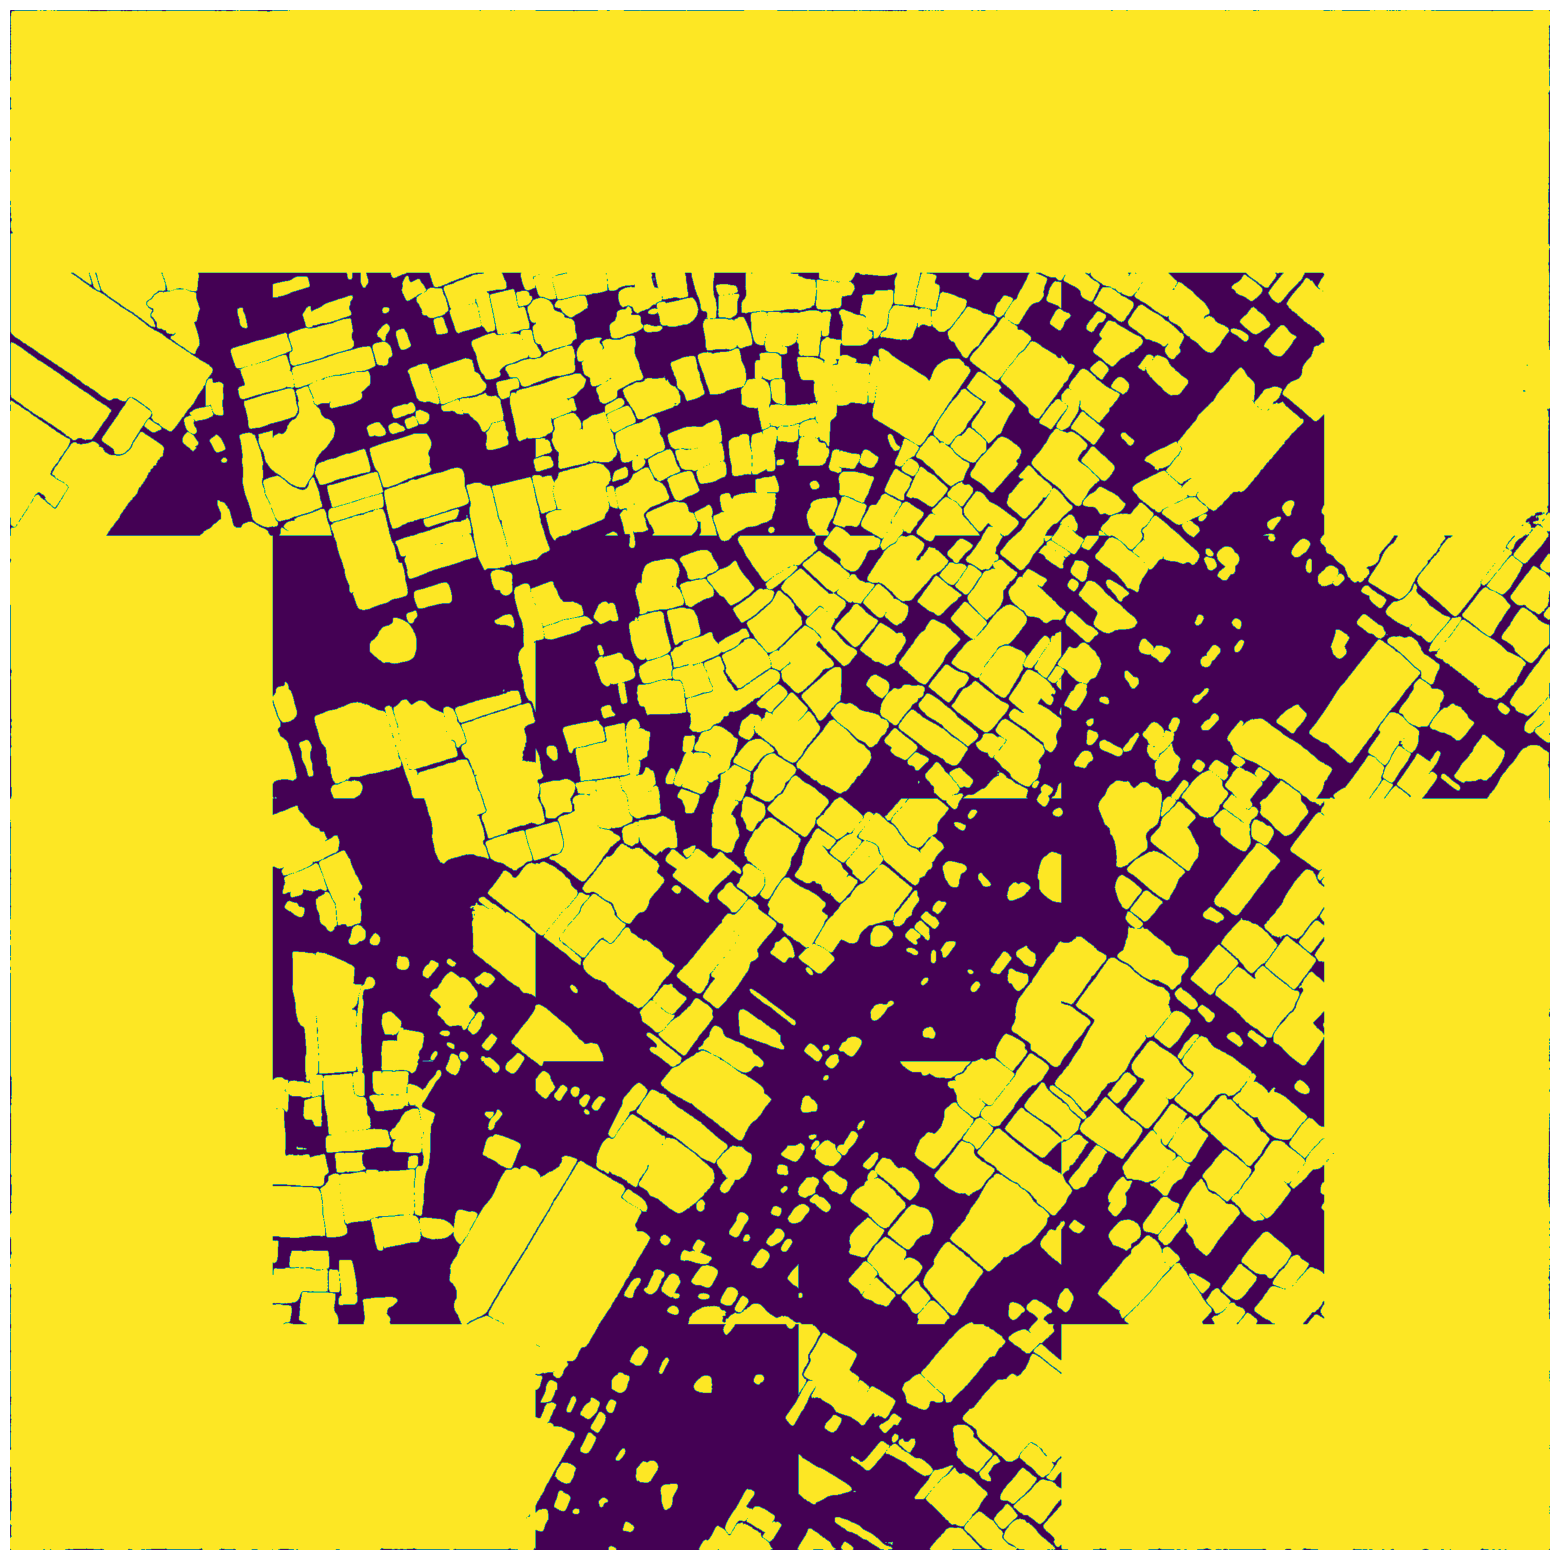

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 指定处理后的图像路径
processed_image_path = '/content/segment.tif'  # 如果您的处理后的图像保存在其他路径，请修改此处

# 读取图像
processed_img = Image.open(processed_image_path)

# 使用 matplotlib 展示图像
plt.figure(figsize=(20, 20))
plt.imshow(processed_img)
plt.axis('off')  # 不显示坐标轴
plt.show()


In [ ]:
from PIL import Image

# 载入图像
img = Image.open('/content/segment.tif')  # 使用上传的图像路径

# 转换为灰度图像
img_gray = img.convert('L')

# 指定保存路径
save_path = '/content/drive/MyDrive/Colab/Samgeo/processed_image_gray.png'

# 保存图像
img_gray.save(save_path)
